In [1]:
!pip install tensorflow==2.13.0
!pip install keras==2.13.1
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
img_width=300
img_height=450

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
#Now let us read metadata to get our Y values (multiple lables)
df_train = pd.read_csv("/content/gdrive/My Drive/dataset/groundtruths/training_labels.csv")

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_train = df_train.drop(['ID', 'Disease_Risk'], axis=1)

In [5]:
df_train.head()

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
def check_disease(df):
    disease_name, zeroCount, oneCount = [], [], []
    rowLen = len(df)
    for (column_name, column) in df.iteritems():
        disease_name.append(column_name)
        zeroCount.append(df[column_name].value_counts()[0])
    oneCount = [rowLen - x for x in zeroCount]

    return disease_name, zeroCount, oneCount

# Insert the image ID
def img_id(df,num):
    id_list = []
    for i in range(num):
        id_list.append(i+1)
    df.insert(0,'ID',id_list)

<ipython-input-6-bd8e8e90ef35>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (column_name, column) in df.iteritems():


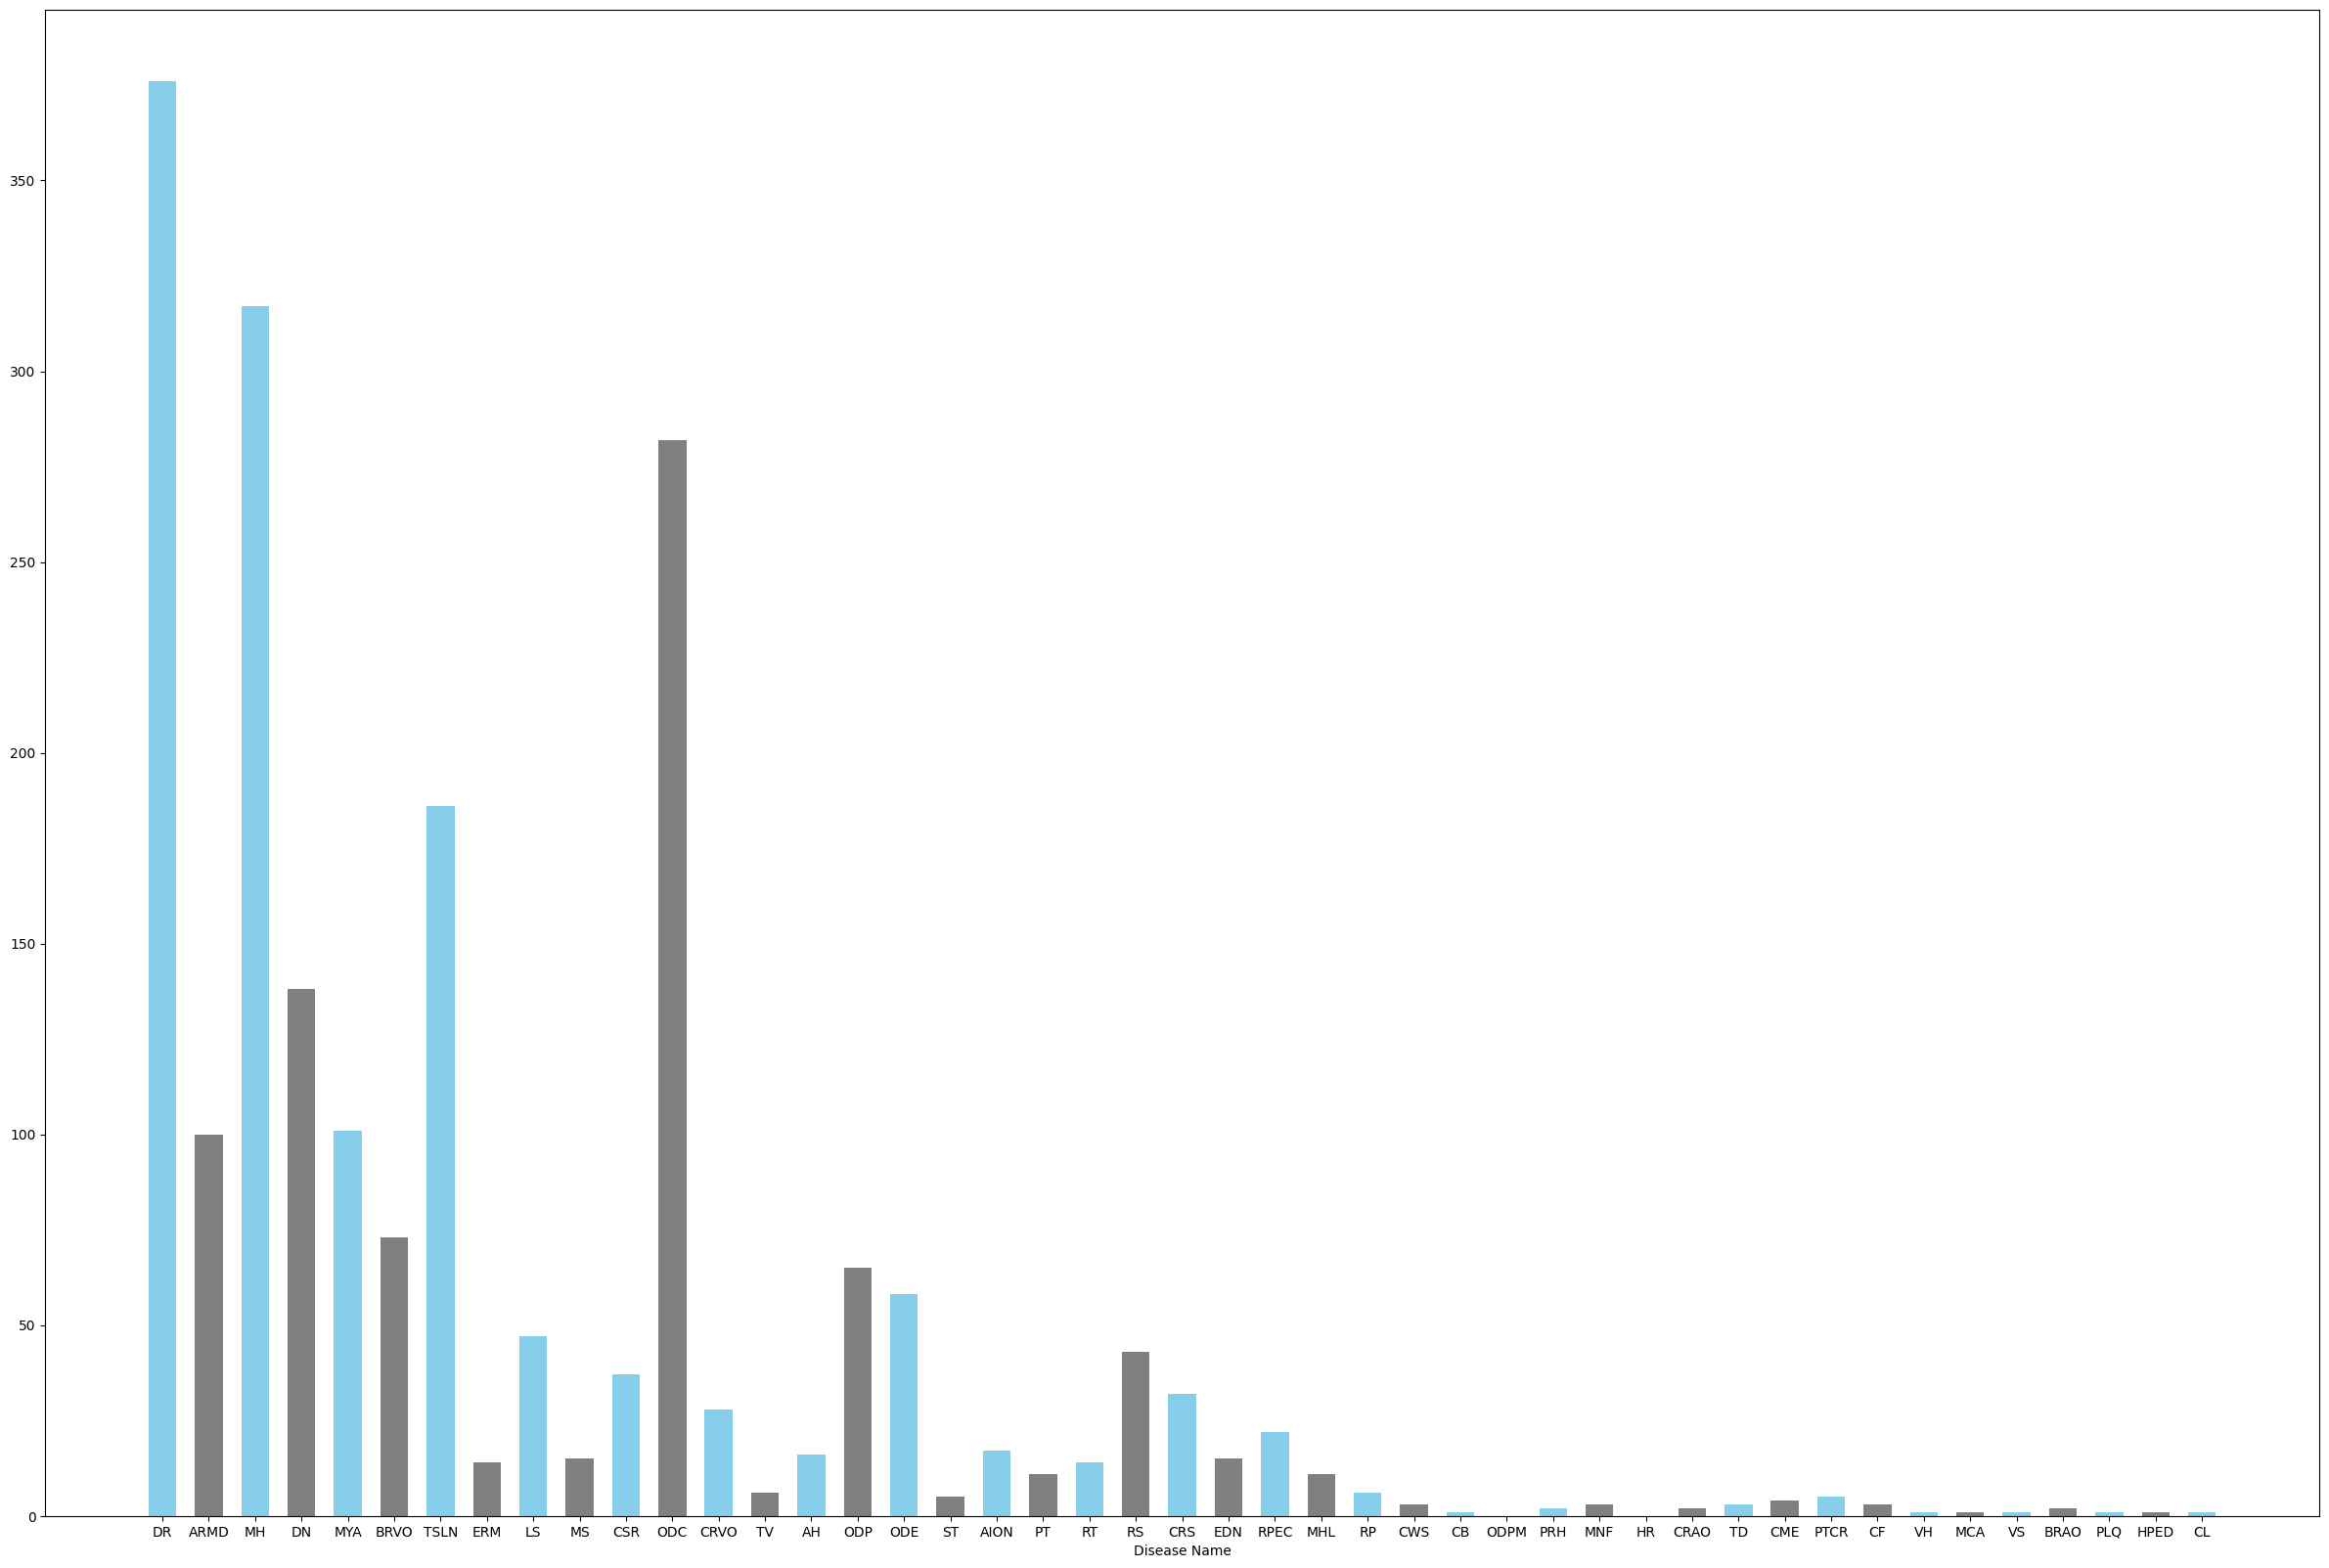

In [7]:
disease_name, zeroCount, oneCount = check_disease(df_train)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [8]:
disease_name, zeroCount, oneCount = check_disease(df_train)

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))

# Insert Image ID
img_id(df_train,len(df_train))

DR appear: 376
ARMD appear: 100
MH appear: 317
DN appear: 138
MYA appear: 101
BRVO appear: 73
TSLN appear: 186
ERM appear: 14
LS appear: 47
MS appear: 15
CSR appear: 37
ODC appear: 282
CRVO appear: 28
TV appear: 6
AH appear: 16
ODP appear: 65
ODE appear: 58
ST appear: 5
AION appear: 17
PT appear: 11
RT appear: 14
RS appear: 43
CRS appear: 32
EDN appear: 15
RPEC appear: 22
MHL appear: 11
RP appear: 6
CWS appear: 3
CB appear: 1
ODPM appear: 0
PRH appear: 2
MNF appear: 3
HR appear: 0
CRAO appear: 2
TD appear: 3
CME appear: 4
PTCR appear: 5
CF appear: 3
VH appear: 1
MCA appear: 1
VS appear: 1
BRAO appear: 2
PLQ appear: 1
HPED appear: 1
CL appear: 1


<ipython-input-6-bd8e8e90ef35>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (column_name, column) in df.iteritems():


In [9]:
import keras.utils as image
X_dataset = []
print(tqdm(range(df_train.shape[0])))
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img('/content/gdrive/My Drive/dataset/original_images/training_set/'+str(df_train['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/1920 [00:00<?, ?it/s]


  0%|          | 0/1920 [00:00<?, ?it/s]


100%|██████████| 1920/1920 [03:33<00:00,  8.98it/s]


In [10]:
X_train = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_train = np.array(df_train.drop(['ID'], axis=1))

In [11]:
#Now let us read metadata to get our Y values (multiple lables)
df_test = pd.read_csv("/content/gdrive/My Drive/dataset/groundtruths/testing_labels.csv")

#ID and Disease_Risk are not labels to be trained. So drop them from the dataframe.
df_test = df_test.drop(['ID', 'Disease_Risk'], axis=1)


In [12]:
df_test.head()

,DR,ARMD,MH,DN,MYA,BRVO,TSLN,ERM,LS,MS,...,CME,PTCR,CF,VH,MCA,VS,BRAO,PLQ,HPED,CL
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<ipython-input-6-bd8e8e90ef35>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (column_name, column) in df.iteritems():


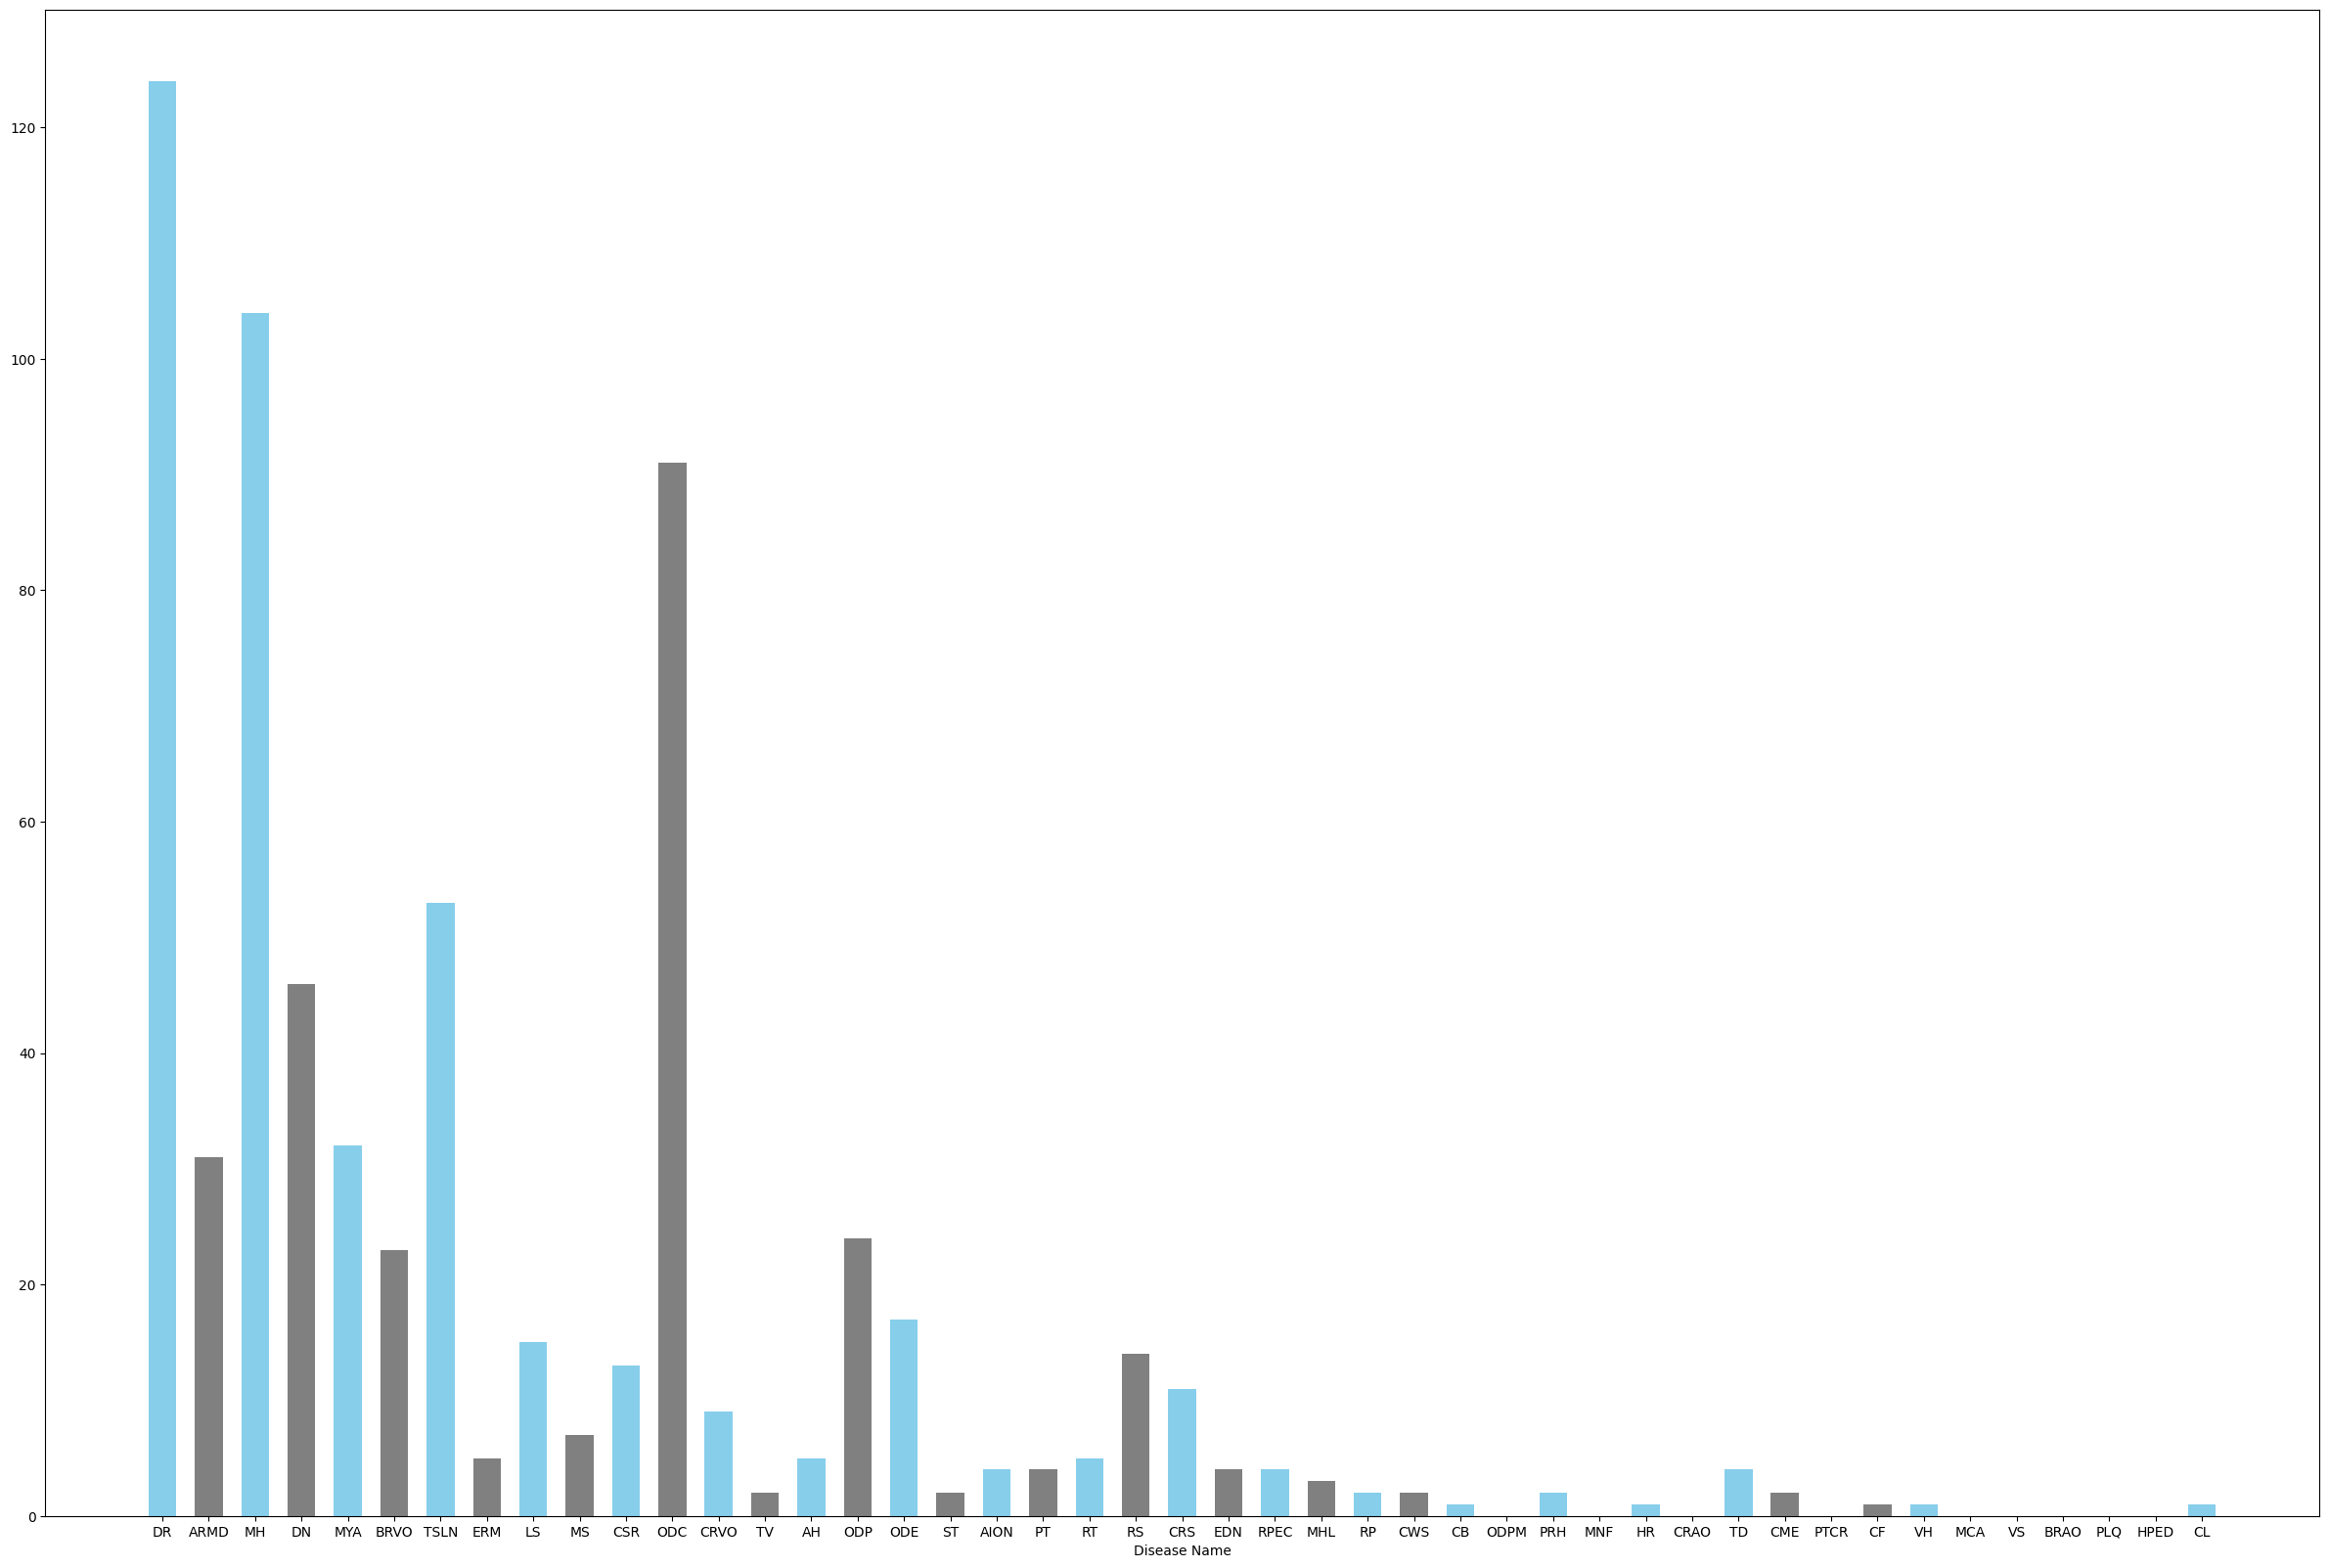

In [13]:
disease_name, zeroCount, oneCount = check_disease(df_test)

fig = plt.figure(figsize=(30, 20))
plt.bar(disease_name, oneCount, width=0.6, color=['skyblue', 'gray'])
plt.xlabel('Disease Name')
plt.show()

In [14]:
disease_name, zeroCount, oneCount = check_disease(df_test)

for i in range(len(disease_name)):
    print(str(disease_name[i]) + ' appear: '+ str(oneCount[i]))

# Insert Image ID
img_id(df_test,len(df_test))


DR appear: 124
ARMD appear: 31
MH appear: 104
DN appear: 46
MYA appear: 32
BRVO appear: 23
TSLN appear: 53
ERM appear: 5
LS appear: 15
MS appear: 7
CSR appear: 13
ODC appear: 91
CRVO appear: 9
TV appear: 2
AH appear: 5
ODP appear: 24
ODE appear: 17
ST appear: 2
AION appear: 4
PT appear: 4
RT appear: 5
RS appear: 14
CRS appear: 11
EDN appear: 4
RPEC appear: 4
MHL appear: 3
RP appear: 2
CWS appear: 2
CB appear: 1
ODPM appear: 0
PRH appear: 2
MNF appear: 0
HR appear: 1
CRAO appear: 0
TD appear: 4
CME appear: 2
PTCR appear: 0
CF appear: 1
VH appear: 1
MCA appear: 0
VS appear: 0
BRAO appear: 0
PLQ appear: 0
HPED appear: 0
CL appear: 1


<ipython-input-6-bd8e8e90ef35>:4: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (column_name, column) in df.iteritems():


In [15]:
X_dataset = []
print(tqdm(range(df_test.shape[0])))
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img('/content/gdrive/My Drive/dataset/original_images/testing_set/'+str(df_test['ID'][i])+'.png', target_size=(img_width,img_height,3))
    img = image.img_to_array(img)
    img = img/255.
    X_dataset.append(img)

  0%|          | 0/640 [00:00<?, ?it/s]


  0%|          | 0/640 [00:00<?, ?it/s]


100%|██████████| 640/640 [01:17<00:00,  8.29it/s]


In [16]:
X_test = np.array(X_dataset)

#ID are not labels to be trained. So drop them from the dataframe.
Y_test = np.array(df_test.drop(['ID'], axis=1))

In [17]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), padding="same" , activation="relu", input_shape=(img_width,img_height,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding="same", activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(45, activation='sigmoid'))


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 300, 450, 16)      1216      
                                                                 
 batch_normalization (Batch  (None, 300, 450, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 150, 225, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 150, 225, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 225, 32)      12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 75, 112, 32)       0

In [19]:
# model.compile(optimizer='adam', loss=tf.losses.CategoricalFocalCrossentropy(), metrics=['accuracy']) # 0.2953, 0.4062 with Dropout
# model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy']) # 0.3094, 0.4031 with Dropout 34.6875 %
model.compile(optimizer='adam', loss=tf.losses.BinaryFocalCrossentropy(), metrics=['accuracy']) # 0.3031, 0.4062 with Dropout, 40.312498807907104 %

In [20]:
history = model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/100
30/30 [==============================] - 17s 161ms/step - loss: 1.1464 - accuracy: 0.1365 - val_loss: 0.8910 - val_accuracy: 0.0219
Epoch 2/100
30/30 [==============================] - 3s 101ms/step - loss: 0.9603 - accuracy: 0.2016 - val_loss: 0.8839 - val_accuracy: 0.0422
Epoch 3/100
30/30 [==============================] - 3s 102ms/step - loss: 0.9473 - accuracy: 0.1797 - val_loss: 1.0817 - val_accuracy: 0.0422
Epoch 4/100
30/30 [==============================] - 3s 99ms/step - loss: 0.9274 - accuracy: 0.1536 - val_loss: 0.9735 - val_accuracy: 0.0453
Epoch 5/100
30/30 [==============================] - 3s 101ms/step - loss: 0.9058 - accuracy: 0.1724 - val_loss: 0.9015 - val_accuracy: 0.1312
Epoch 6/100
30/30 [==============================] - 3s 101ms/step - loss: 0.8805 - accuracy: 0.1536 - val_loss: 1.0230 - val_accuracy: 0.1547
Epoch 7/100
30/30 [==============================] - 3s 101ms/step - loss: 0.8533 - accuracy: 0.1531 - val_loss: 0.8446 - val_accuracy: 0.0922

1/1 [==============================] - 0s 229ms/step


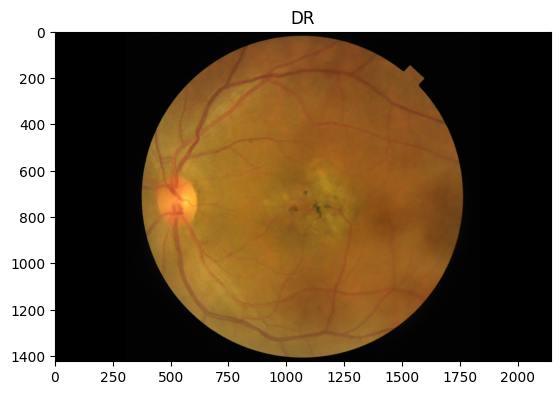

In [21]:
#Validate on an image
import keras.utils as image
from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

new_path = '/content/gdrive/My Drive/dataset/original_images/testing_set/7.png'
image_result=Image.open(new_path)

def data_resizing_process(dirs):
    datas = image.load_img(dirs, target_size = (img_width, img_height))
    res = image.img_to_array(datas)
    res = np.expand_dims(res, axis = 0)
    res /= 255
    return res

img = data_resizing_process(new_path)
result = model.predict(img)

Categories=disease_name
image_result=plt.imshow(image_result)
plt.title(Categories[np.argmax(result)])
plt.show()

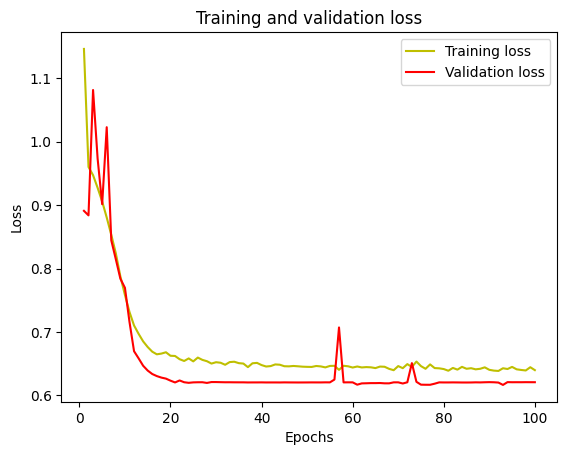

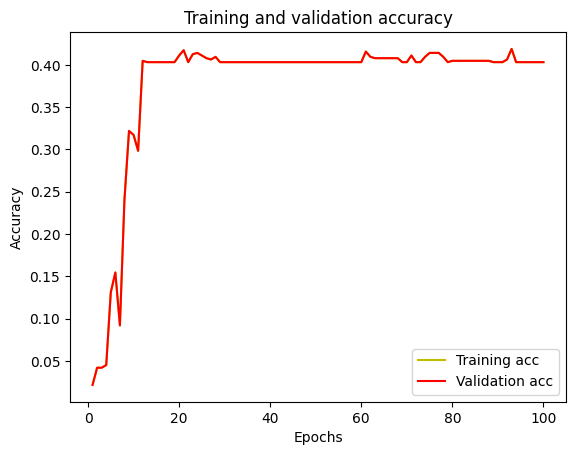

In [22]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['val_accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
_, acc = model.evaluate(X_test, Y_test)
print("Accuracy = ", (acc * 100.0), "%")

20/20 [==============================] - 1s 19ms/step - loss: 0.6207 - accuracy: 0.4031
Accuracy =  40.312498807907104 %


In [24]:
model.save('multi_CNN_v2.0.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
